In [13]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    # df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES

In [14]:
relevances_fluorine = {'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.006, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.342, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.037, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.454, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.0, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.084, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.115, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.361, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': 0.0, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.0, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCCC1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': 0.0, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.532, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.724, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': -0.197, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': -0.102, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': -0.0, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': -0.141, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.0, 'O=C(N1CCC1)C1=CC=CC=C1': 0.0, 'FC1CN(C1)C(=O)C1=CC=CC=C1': 0.072, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.151, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': -0.135, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.28, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.187, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.253, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.257, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.42, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.286, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.266, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.345, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.211, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.112, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.248, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.189, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.51, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.272, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 0.228, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.229, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.22, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.024, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.051, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.335, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.149, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.549, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.373, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.422, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.504, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 0.218, 'CCNC(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.433, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.38, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': 0.022, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.238, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.427, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': -0.035, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.02, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.238, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.129, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.211, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.228, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.765, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.149, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': -0.124, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.11, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.021}

cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles = train_test_smiles_data()

In [15]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [16]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

['CH2F', 'CHF2', 'CF3'] [0.228, 0.272, 0.51]
['CH2F', 'CHF2', 'CF3'] [0.189, 0.248, 0.454]
['CH2F', 'CHF2', 'CF3'] [0.112, 0.211, 0.361]
['CH2F', 'CHF2'] [-0.11, 0.229]
['CH2F', 'CHF2', 'CF3'] [[0.228, 0.189, 0.112, -0.11], [0.272, 0.248, 0.211, 0.229], [0.51, 0.454, 0.361]]


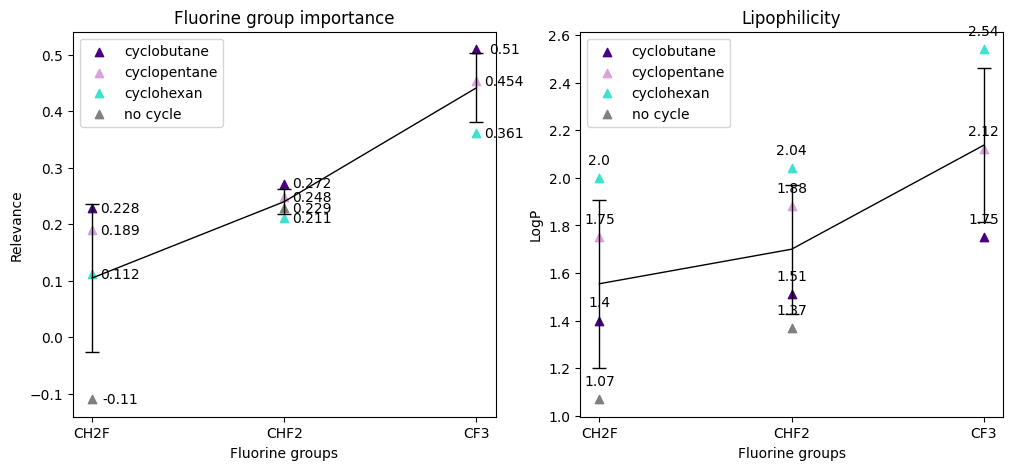

['CH2F', 'CHF2', 'CF3'] [0.422, 0.373, 0.549]
['CH2F', 'CHF2', 'CF3'] [0.149, 0.149, 0.335]
['CH2F', 'CHF2', 'CF3'] [0.051, 0.024, 0.22]
['CH2F', 'CHF2', 'CF3'] [0.218, 0.504, 0.765]
['CH2F', 'CHF2', 'CF3'] [[0.422, 0.149, 0.051, 0.218], [0.373, 0.149, 0.024, 0.504], [0.549, 0.335, 0.22, 0.765]]


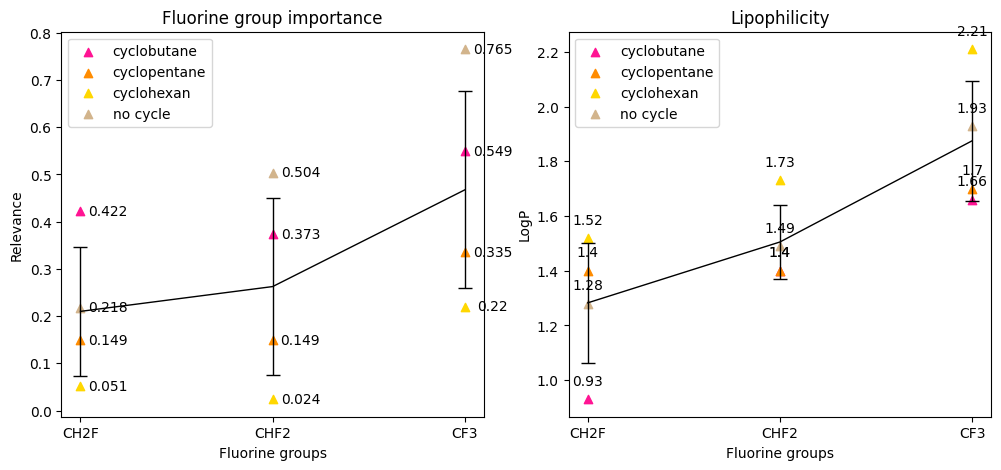

['CH2F', 'CHF2', 'CF3'] [0.38, 0.228, 0.433]
['CH2F', 'CHF2', 'CF3'] [0.022, 0.238, 0.427]
['CH2F', 'CHF2', 'CF3'] [[0.38, 0.022], [0.228, 0.238], [0.433, 0.427]]


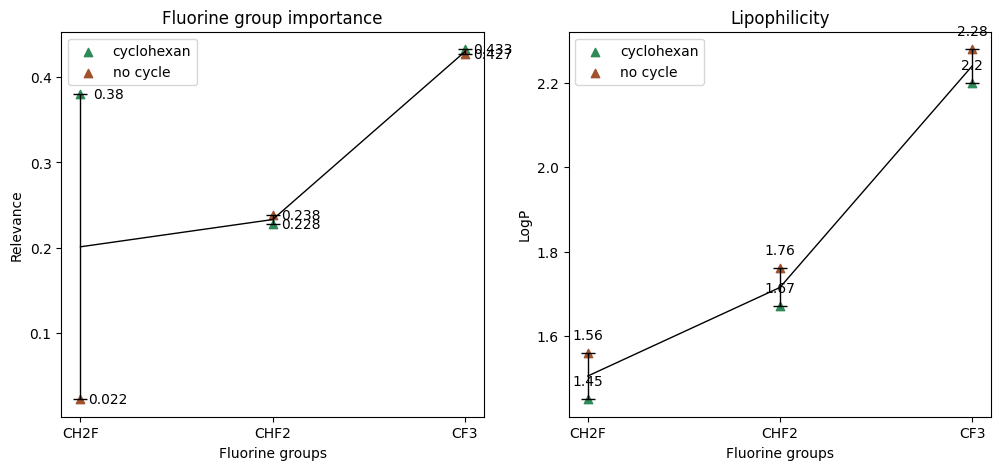

In [18]:
import matplotlib.pyplot as plt
import numpy as np

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'no cycle'

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    


primary amines

In [36]:
relevances_fluorine = {'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.006, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.342, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.156, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': -0.26, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.0, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.559, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.121, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.712, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.712, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.275, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.275, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.401, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.401, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.229, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.504, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 0.218, 'CCNC(=O)C1=CC=CC=C1': 0.0, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': 0.022, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.238, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.427, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 0.001, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': -0.037, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': -0.102, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.249, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 0.006, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.262, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.326, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': -0.035, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.02, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.238, 'O=C(NC1CC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.0, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': -0.427, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.655, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.726, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.832, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.395, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.588, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.0, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': -0.015, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.0, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.307, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.765, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': 0.02, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': -0.164, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.208, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.225, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.11, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.47, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.021}

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles = train_test_smiles_data()

In [37]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

CCC(F)(F)CC(=O)NC1=CC=CC=C1 ((2, 3), (2, 4)) gem-CF2 3
FC(F)CCCC(=O)NC1=CC=CC=C1 ((3, 1, 0, 2),) CHF2 4
CCCCC(=O)NC1=CC=CC=C1 () non-F inf
FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 4
FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 4
O=C(NC1CCCCC1)C1=CC=CC=C1 () non-F inf
O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1 () non-F inf
O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1 () non-F inf
FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 1
FCC1(CCC1)NC(=O)C1=CC=CC=C1 ((2, 1, 0),) CH2F 1
FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 3
FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 3
[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 3
[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 3
[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 3
[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 3
[H]C(F)(F)CNC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 1
[H]C(F)(F)

cyclobutane CF3 FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1 2.51 0.559
cyclobutane CH2F FCC1(CCC1)NC(=O)C1=CC=CC=C1 2.03 0.121
methane CHF2 [H]C(F)(F)CNC(=O)C1=CC=CC=C1 1.37 0.229
methane CH2F [H]C([H])(F)CNC(=O)C1=CC=CC=C1 1.07 -0.11
cyclobutane CHF2 FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1 2.48 0.47
cyclobutane ['CH2F', 'CHF2', 'CF3'] [0.121, 0.47, 0.559]
cyclopropane [] []
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F', 'CHF2'] [-0.11, 0.229]
['CH2F', 'CHF2', 'CF3'] [[0.121, -0.11], [0.47, 0.229], [0.559]]
CH2F 1.5499999999999998
CHF2 1.925
CF3 2.51


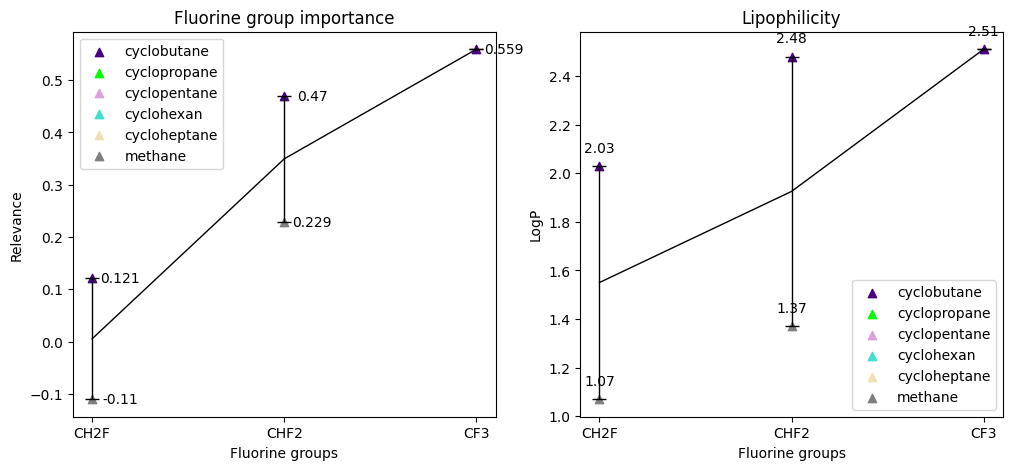

methane CHF2 [H]C(F)(F)CCNC(=O)C1=CC=CC=C1 1.49 0.504
methane CH2F [H]C([H])(F)CCNC(=O)C1=CC=CC=C1 1.28 0.218
cyclopentane gem-CF2 FC1(F)CCCC1NC(=O)C1=CC=CC=C1 1.87 -0.037
cyclohexane gem-CF2 FC1(F)CCCCC1NC(=O)C1=CC=CC=C1 2.16 -0.102
cyclohexane gem-CF2 FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1 2.56 0.006
methane gem-CF2 CCC(F)(F)CNC(=O)C1=CC=CC=C1 2.04 -0.035
cyclobutane CF3 FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1 2.54 0.655
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1 1.79 0.726
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1 2.16 0.832
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1 1.64 0.395
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1 1.36 0.588
cyclobutane CHF2 [H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1 1.94 0.307
methane CF3 FC(F)(F)CCNC(=O)C1=CC=CC=C1 1.93 0.765
cyclobutane gem-CF2 FC1(F)CCC1NC(=O)C1=CC=CC=C1 1.7 0.02
cyclobutane CH2F [H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1 1.85 0.208
cyclobutane ['CH2F', 'CHF2', 'CF3'] [0.208, 0.30

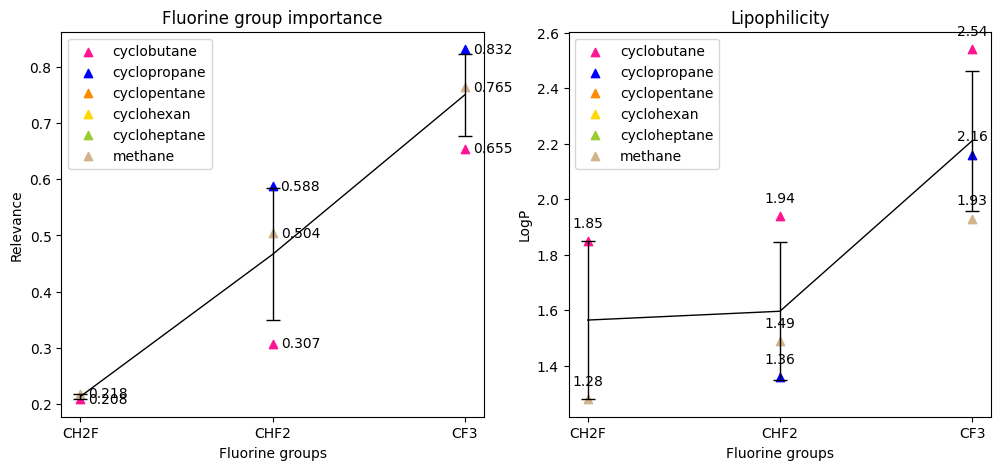

methane gem-CF2 CCC(F)(F)CC(=O)NC1=CC=CC=C1 2.26 0.006
cyclobutane CF3 FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 2.82 0.712
cyclobutane CF3 FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 2.62 0.712
cyclobutane CHF2 [H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.97 0.275
cyclobutane CHF2 [H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.98 0.275
cyclobutane CH2F [H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.78 0.401
cyclobutane CH2F [H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.77 0.401
methane CH2F [H]C([H])(F)CCCNC(=O)C1=CC=CC=C1 1.56 0.022
methane CHF2 [H]C(F)(F)CCCNC(=O)C1=CC=CC=C1 1.76 0.238
methane CF3 FC(F)(F)CCCNC(=O)C1=CC=CC=C1 2.28 0.427
cyclobutane gem-CF2 FC1(F)CC(C1)NC(=O)C1=CC=CC=C1 1.94 0.001
cyclohexane gem-CF2 FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1 2.31 -0.249
cyclohexane gem-CF2 FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1 2.57 -0.262
methane gem-CF2 CC(F)(F)CCNC(=O)C1=CC=CC=C1 1.81 0.02
methane CHF2 FC(F)CCCNC(=O)C1=CC=CC=C1 1.76 0.238
cyclopentane gem-CF2 FC1(F)CCC(C1)NC(=O)C1=CC=CC

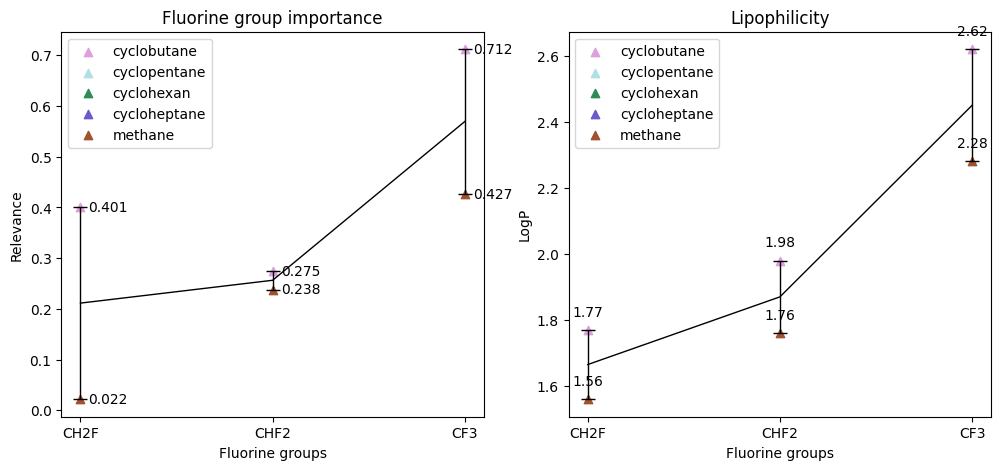

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna', 4: 'blue'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}, 4: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("="*30)
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP),
                                                    (cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(label, X_local, y_relevance)
        # lists = sorted(zip(*[X_local, y_relevance]))
        # new_x, new_y = list(zip(*lists))
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        print(X[i], mean_logP_Y[i])
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    


--------

--------

--------

--------

--------

ACIDIC SME

In [41]:
relevances_fluorine = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.0, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.14, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.12, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.0, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': 0.167, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.379, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.34, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.518, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.518, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.205, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.205, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.302, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.302, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': -0.263, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': -0.38, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': -0.577, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': -0.464, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': -0.366, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': -0.521, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': -0.486, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.006, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.342, 'O=C(NC1=CC=CC=C1)C1CC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.0, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.421, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 0.0, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.219, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.114, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.197, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.445, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.464, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.166, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.269, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.068, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.0, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.319, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': -0.043, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.025, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': -0.546, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': -0.441, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.0, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.0, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.284, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': -0.307, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': -0.505, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.021}

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles = train_test_smiles_data()

In [42]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen - 1

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(NC1=CC=CC=C1)C1CCCCC1 () non-F inf cyclohexane
O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 5 bicyclo[3.1.0]hexane
FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 5 bicyclo[3.1.0]hexane
O=C(NC1=CC=CC=C1)C1CCC1 () non-F inf cyclobutane
FCC1(CCC1)C(=O)NC1=CC=CC=C1 ((2, 1, 0),) CH2F 2 cyclobutane
FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1 ((3, 1, 0, 2),) CHF2 2 cyclobutane
FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 2 cyclobutane
FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 4 cyclobutane
FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 4 cyclobutane
[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 4 cyclobutane
[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 4 cyclobutane
[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1

cyclobutane CH2F FCC1(CCC1)C(=O)NC1=CC=CC=C1 1.88 0.167
cyclobutane CHF2 FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1 2.19 0.379
cyclobutane CF3 FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1 2.51 0.34
[] []
['CH2F', 'CHF2', 'CF3'] [0.167, 0.379, 0.34]
[] []
[] []
[] []
[] []
['CH2F', 'CHF2', 'CF3'] [[0.167], [0.379], [0.34]]


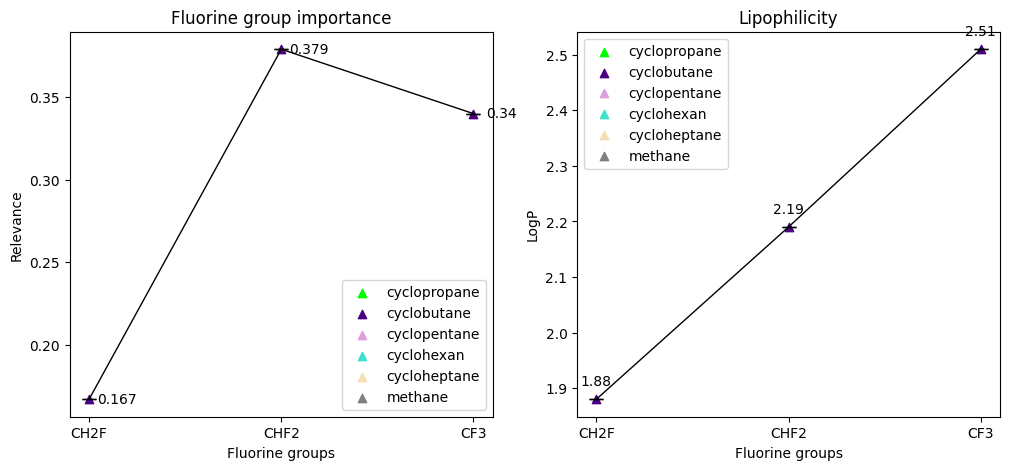

cyclopentane gem-CF2 FC1(F)CCCC1C(=O)NC1=CC=CC=C1 2.25 -0.38
cyclohexane gem-CF2 FC1(F)CCCCC1C(=O)NC1=CC=CC=C1 2.5 -0.464
cyclohexane gem-CF2 FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1 2.9 -0.366
methane gem-CF2 CCC(F)(F)CC(=O)NC1=CC=CC=C1 2.26 0.006
cyclobutane CF3 FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.88 0.219
cyclobutane CHF2 [H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.22 -0.114
cyclobutane CH2F [H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.11 -0.197
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 2.98 0.445
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 2.12 0.464
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 2.28 0.166
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 2.35 0.269
cyclopropane CH2F [H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 1.12 0.068
cyclopropane gem-CF2 FC1(F)CC1C(=O)NC1=CC=CC=C1 2.07 0.025
cyclobutane gem-CF2 FC1(F)CCC1C(=O)NC1=CC=CC=C1 2.03 -0.307
['CH2F', 'CHF2', 'CF3'] [0.068, 0.269, 0.464]
['CH2F', 'CHF2', 'CF3'] [-0.1

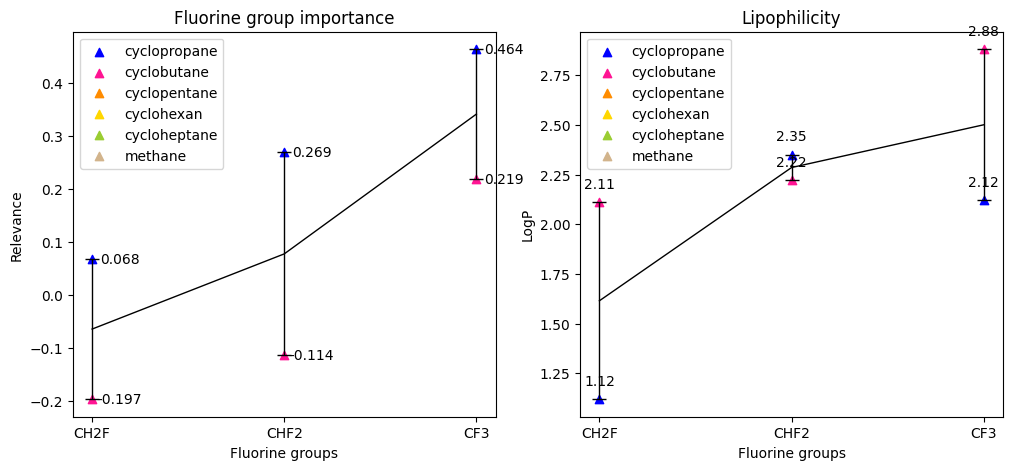

cyclobutane CF3 FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 3.02 0.518
cyclobutane CF3 FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.72 0.518
cyclobutane CHF2 [H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.39 0.205
cyclobutane CHF2 [H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.23 0.205
cyclobutane CH2F [H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.14 0.302
cyclobutane CH2F [H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 1.96 0.302
cyclobutane gem-CF2 FC1(F)CC(C1)C(=O)NC1=CC=CC=C1 2.26 -0.263
cyclopentane gem-CF2 FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1 2.5 -0.577
cyclohexane gem-CF2 FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1 3.03 -0.521
methane CHF2 FC(F)CCCC(=O)NC1=CC=CC=C1 2.06 0.342
cyclohexane gem-CF2 FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1 2.72 -0.505
methane gem-CF2 CC(F)(F)CCC(=O)NC1=CC=CC=C1 2.12 -0.021
['CH2F', 'CHF2', 'CF3'] [0.302, 0.205, 0.518]
[] []
[] []
[] []
['CHF2'] [0.342]
['CH2F', 'CHF2', 'CF3'] [[0.302], [0.205, 0.342], [0.518]]


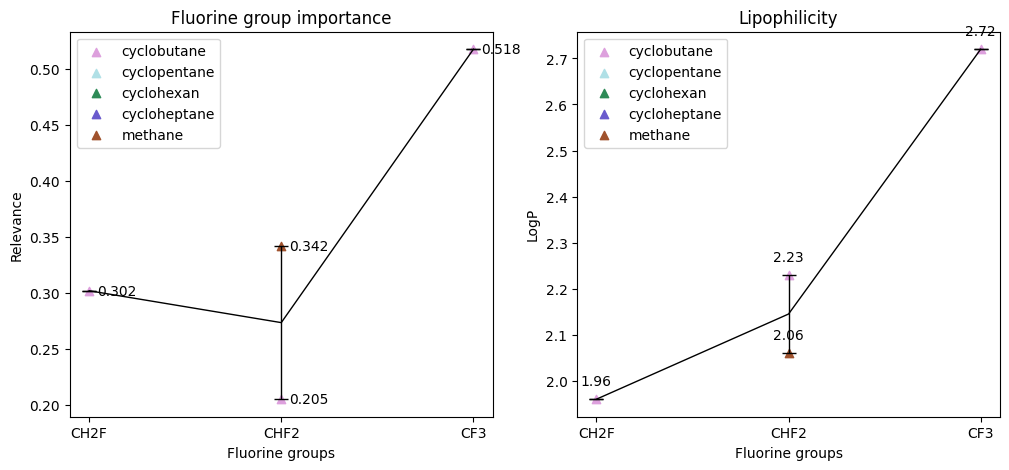

In [45]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    
